In [ ]:
 import pandas as pd

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving HRDataset_v14.csv to HRDataset_v14 (1).csv


The CSV file is loaded into a Pandas DataFrame named df.

In [ ]:
df = pd.read_csv('HRDataset_v14.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


Basic information about the dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

Distribution plots for the Department and Salary columns are created using Seaborn and Matplotlib library

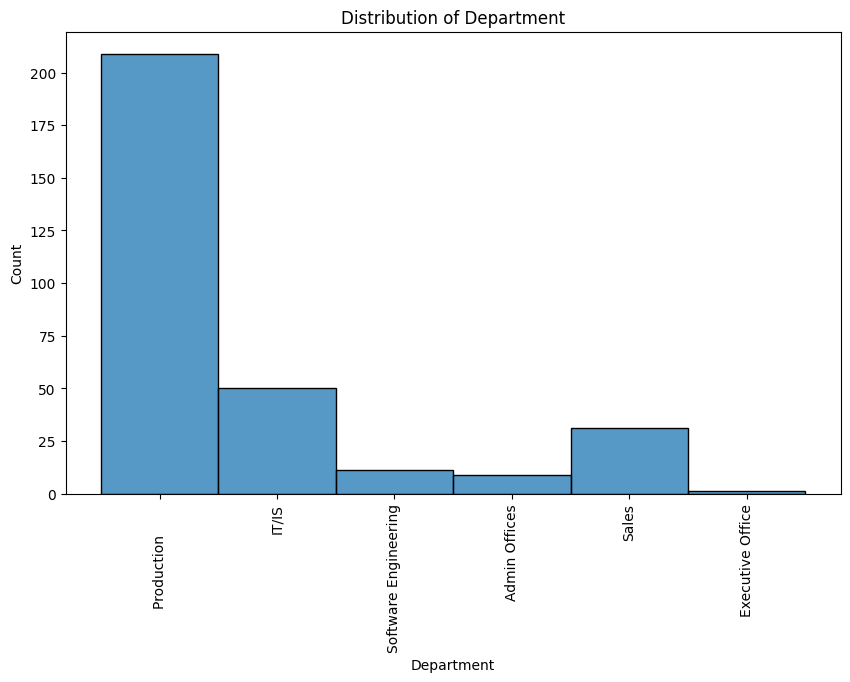

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Department'])
plt.title('Distribution of Department')
plt.xticks(rotation=90)
plt.show()

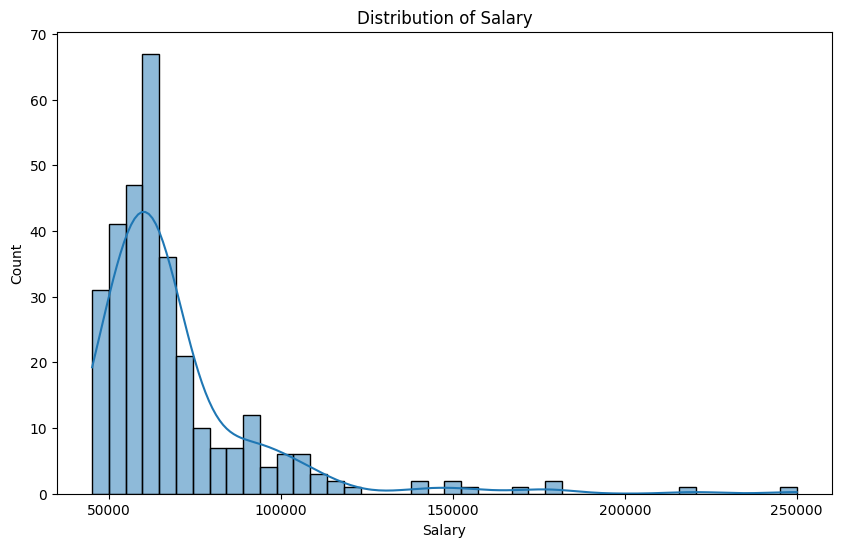

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True)
plt.title('Distribution of Salary')
plt.show()

In [ ]:
# Separate numeric columns
numeric_df = df.select_dtypes(include=['number'])
print("Min values:\n", numeric_df.min())
print("Max values:\n", numeric_df.max())
print("Variance:\n", numeric_df.var())


Min values:
 EmpID                     10001.00
MarriedID                     0.00
MaritalStatusID               0.00
GenderID                      0.00
EmpStatusID                   1.00
DeptID                        1.00
PerfScoreID                   1.00
FromDiversityJobFairID        0.00
Salary                    45046.00
Termd                         0.00
PositionID                    1.00
Zip                        1013.00
ManagerID                     1.00
EngagementSurvey              1.12
EmpSatisfaction               1.00
SpecialProjectsCount          0.00
DaysLateLast30                0.00
Absences                      1.00
dtype: float64
Max values:
 EmpID                      10311.0
MarriedID                      1.0
MaritalStatusID                4.0
GenderID                       1.0
EmpStatusID                    5.0
DeptID                         6.0
PerfScoreID                    4.0
FromDiversityJobFairID         1.0
Salary                    250000.0
Termd         

A correlation matrix of numerical columns is plotted to show relationships between variables.

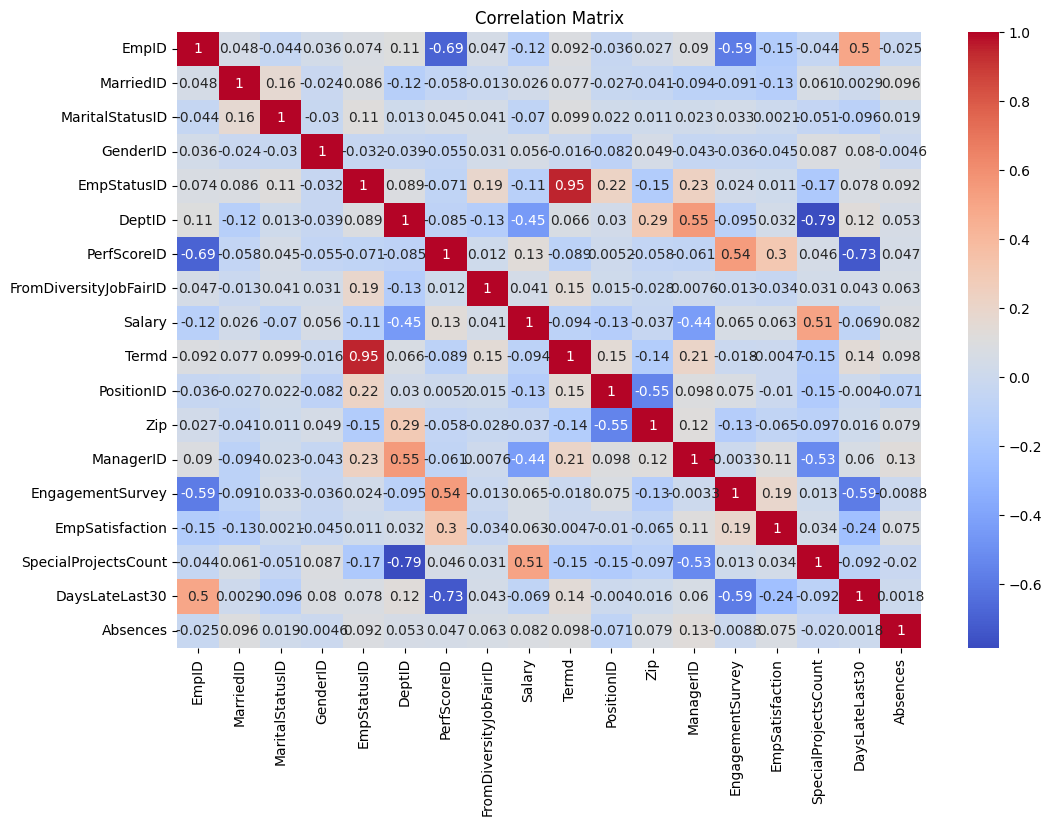

In [ ]:
numeric_df = df.select_dtypes(include=[float, int])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Create Spark SQL Queries

In [ ]:
!pip install pyspark




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=316e4a60129b85f4203a3fee94754fb0075288cc9f42333e2e566e3859f767c0
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


**************Spark SQL Queries*************

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
# Initialize a Spark session
spark = SparkSession.builder.appName("EDA and ML").getOrCreate()

# Convert the Pandas DataFrame to a Spark DataFrame
spark_df = spark.createDataFrame(df)

# Create a temporary view
spark_df.createOrReplaceTempView("hr_data")


query1: Counts the total number of records.
query2: Calculates the average salary per department.
query3: Selects records where the salary is greater than $100,000.
query4: Counts the number of employees per department, filtered to departments with more than 10 employees.
query5: Finds the minimum and maximum salary in the dataset.

In [ ]:
query1 = spark.sql("SELECT COUNT(*) AS Total_Records FROM hr_data")
query2 = spark.sql("SELECT Department, AVG(Salary) AS Avg_Salary FROM hr_data GROUP BY Department")
query3 = spark.sql("SELECT * FROM hr_data WHERE Salary > 100000")
query4 = spark.sql("SELECT Department, COUNT(*) AS Num_Employees FROM hr_data GROUP BY Department HAVING Num_Employees > 10")
query5 = spark.sql("SELECT MIN(Salary) AS Min_Salary, MAX(Salary) AS Max_Salary FROM hr_data")


In [ ]:
query1.show()
query2.show()
query3.show()
query4.show()
query5.show()

+-------------+
|Total_Records|
+-------------+
|          311|
+-------------+

+--------------------+------------------+
|          Department|        Avg_Salary|
+--------------------+------------------+
|               Sales| 69061.25806451614|
|   Production       |59953.545454545456|
|       Admin Offices| 71791.88888888889|
|    Executive Office|          250000.0|
|Software Engineering| 94989.45454545454|
|               IT/IS|          97064.64|
+--------------------+------------------+

+--------------------+-----+---------+---------------+--------+-----------+------+-----------+----------------------+------+-----+----------+--------------------+-----+----+--------+---+-----------+-------------------+--------------+--------------------+----------+-----------------+--------------------+--------------------+--------------------+------------------+---------+------------------+-----------------+----------------+---------------+--------------------+--------------------------+-----

 ***************************************************Machine Learning Model*************


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
 #Example: Predicting Salary based on numerical features

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
X = df[numerical_features].drop(columns=['Salary'])  # Exclude target variable
y = df['Salary']

In [ ]:
# Drop rows with NaN values because of the errors we have 2choise this or Imputing Missing Values
X = X.dropna()
y = y[X.index]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 717799211.9809021



visualize the dataset using PCA.

error solving advanced eda:  there's an issue with the lengths of the values and the index. This usually occurs when there are missing values in the dataset, causing misalignment between the transformed PCA result and the original dataframe

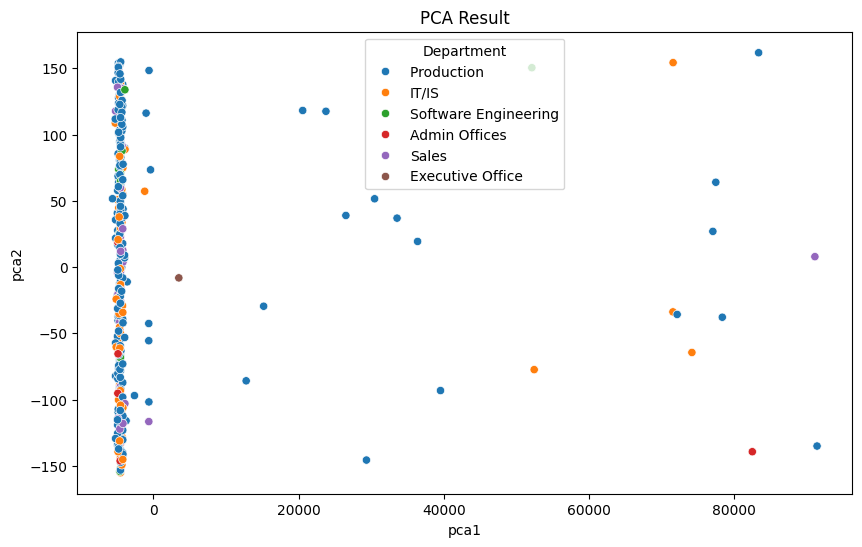

In [ ]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_imputed)

# Create new dataframe with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['pca1', 'pca2'])

df_pca = pd.concat([df, pca_df], axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue='Department')
plt.title('PCA Result')
plt.show()

